# 线性回归
线性回归的基本套路
- Reference: https://zhuanlan.zhihu.com/p/36553041

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## 1. 问题设定

已知有$N$个$x,y$对构成的数据集$X,Y$，其中$x$是特征值，$y$是目标值，我们的目的是通过给定的数据集学习出一种模式，当给出一个新的$x_j$，能够推断出其对应的目标值$y_j$

假定数据集的分布如下图所示：

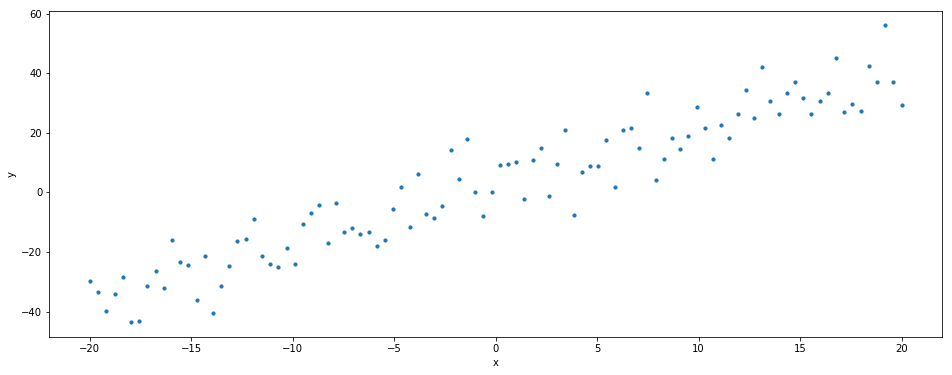

In [32]:
# 模拟数据集
data_count = 100
x_data = np.linspace(-20, 20, data_count)
y_data = np.multiply(2, X) + 3 + np.random.normal(loc=0, scale=8.0, size=(data_count,))

plt.figure(figsize=(16, 6))
plt.scatter(x_data, y_data, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

通过观察可以发现，数据集中$X$和$Y$的分布近似呈线性关系，于是我们很自然地联想到可以将问题转化为求一个关于$x$和$y$的线性函数来拟合数据的分布，当有新的$x_j$抵达时，我们只需将其输入到函数中便可以得到其对应的目标值$y_j$，这就是我们所说的**线性回归**

## 2. 定义目标函数

- $h(x)=wx+b$

其中$x$是特征变量，$w$和$b$是函数的参数

我们的目标是通过该函数拟合数据集$X,Y$的分布，即对每一个取值$x_i$，其对应的函数值$h(x_i)$要尽可能的接近样本的真实值$y_i$

但是目前而言，$w$和$b$的值是未知的，而一旦定义好$w$和$b$的取值，最终的函数也就确定了，我们也就可以使用该函数对新的自变量$x$进行预测了

于是，问题又转变成了求线性方程的参数$w$和$b$，来确定目标函数的最终形态

最简单的方法就是像下面这样随机给定一组$w,b$：

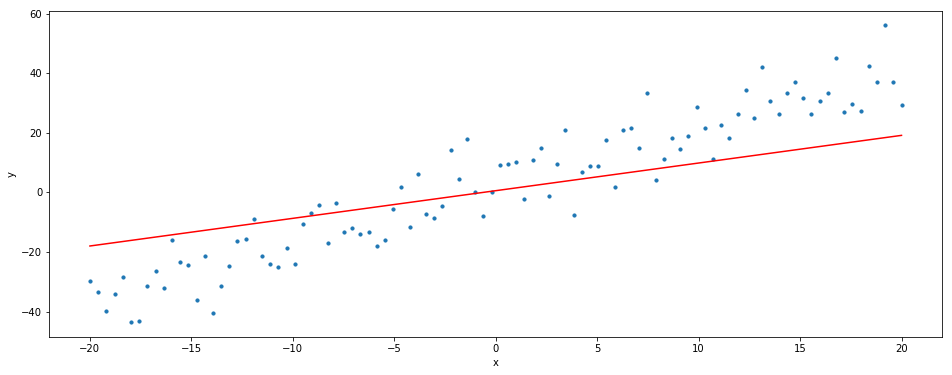

In [47]:
w = np.random.rand()
b = np.random.rand()
y_predict = w * x_data + b

plt.figure(figsize=(16, 6))
plt.scatter(x_data, y_data, s=10)
plt.plot(x_data, y_predict, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

显然，这种方法无法很好的完成任务，当给定一个新的特征值$x$时，通过这个函数得出的目标值跟实际情况可能相距甚远

为了解决这个问题，我们需要探寻某种方法来获得一组较为优质的参数$w,b$，这组参数能使目标函数更好的拟合数据集的分布

容易看出，对于数据集中的一个特征值$x_i$，其对应的目标值$y_i$与函数值$h(x_i)$的距离越接近，则函数对数据的拟合程度越好，对于整个数据集来说，就是所有样本的目标值与函数值距离的和最小，这就是我们所说的**目标函数**

## 3. 定义损失函数

- $loss(w,b)=\frac{1}{N}\sum_{i=0}^{N}(h(x_i)-y_i)^2$



现在我们的问题转变为找到一组合适的$w,b$， 使得$loss(w,b)$最小化

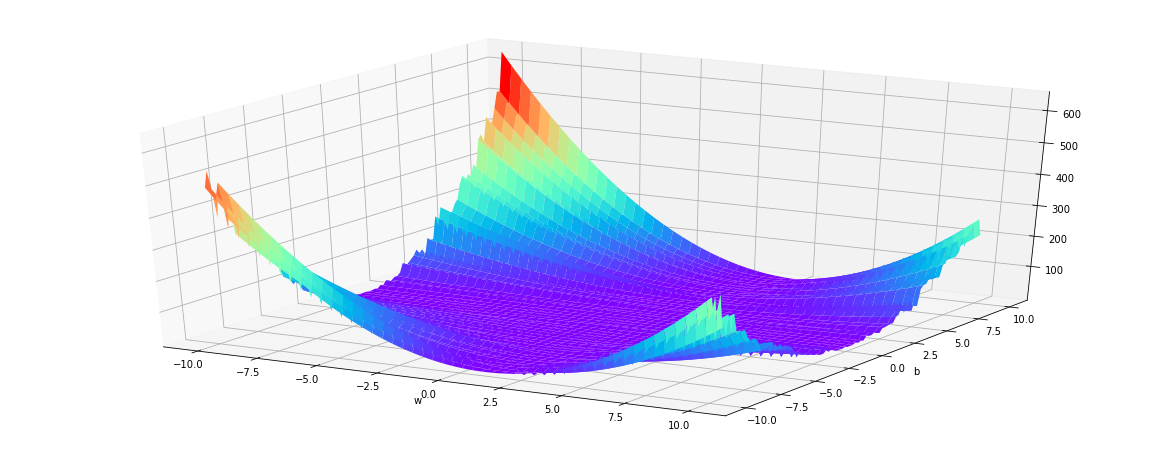

In [31]:
w_sample = np.linspace(-10, 10, data_count).reshape((-1, 1))
b_sample = np.linspace(-10, 10, data_count).reshape((-1, 1))

x_data = x_data.reshape((-1, 1))
y_data = y_data.reshape((-1, 1))

loss = np.square(np.dot(w_sample, x_data.T) + b_sample - y_data) / data_count

figure = plt.figure(figsize=(16, 6))
axes = Axes3D(figure)
axes.set_xlabel('w')
axes.set_ylabel('b')
axes.plot_surface(w_sample.T, b_sample, loss, cmap='rainbow')
plt.show()